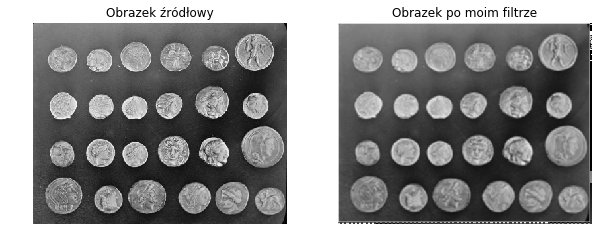

In [18]:
#Zadanie domowe 3 - Filtr
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data, img_as_ubyte
import numpy as np

def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)): #Wyswietlanie dwóch obrazów obok siebie

    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()
    
def filtr(source, mask, border):
    if(mask < 3 or mask % 2 == 0):
        prinf("Error. Incorrect mask")
    else:
        if(len(source.shape) > 2): #Zamiana na obraz w odcieniach szarości
            imgGray = rgb2gray(source.copy())
            imgGray = img_as_ubyte(imgGray)
        else:
            imgGray = source.copy()

        #Wymiary obrazu z ramka
        h = imgGray.shape[0] + 2*border
        w = imgGray.shape[1] + 2*border
        img = np.empty((h,w), source.dtype)
        #Wypełnienie tablicy kolorem
        for i in range(h):
            for j in range(w):
                img[i][j] = 255
        #Dodanie obrazu      
        for i in range(imgGray.shape[0]):
                for j in range(imgGray.shape[1]):
                    img[i+border][j+border] = imgGray[i][j]
        output = np.empty((h,w), source.dtype)
        for i in range(0,img.shape[0]-mask):
            for j in range(0, img.shape[1]-mask):              
                avg = np.mean(img[i:i+mask, j:j+mask])
                output[i][j] = avg
        return output
    
img = data.coins()
img_myFiltr = filtr(img, 3,3)
show2imgs(img, img_myFiltr, 'Obrazek źródłowy', 'Obrazek po moim filtrze')    